## **Import basic libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

#### **Get list of mat-files for sensor fault signals**

In [6]:
import glob

fn_list = glob.glob('./*.mat')
fn_list = [fn.replace('\\', '/') for fn in fn_list]
fn_list

['./ambiguous_drift_J.mat',
 './ambiguous_trend_J.mat',
 './Drift_J.mat',
 './Minor_J.mat',
 './Outlier_J.mat',
 './Square_J.mat',
 './Trend_J.mat']

#### **Define a function for extracting mat-file and saving them as csv-file**

In [7]:
import scipy.io

def import_mat_and_save_csv(fn_path):
    mat_file = scipy.io.loadmat(fn_path)

    fs, signals = mat_file['fs'], mat_file['signal'] 
    N = signals.shape[0]
    t = np.arange(0, N * 1/fs, 1/fs)

    fig, axs = plt.subplots(2, 1, figsize = (7, 3), dpi = 200, constrained_layout=True)
    axs[0].plot(t, signals[:, 1])
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Acc.')
    axs[0].set_title(f'Time history with fs = {fs.item()} Hz')
    

    f, Pxx = mat_file['F'], mat_file['Pxx']

    axs[1].plot(f, Pxx[:, 1])
    axs[1].set_xlabel('Freq. (HZ)')
    axs[1].set_ylabel('PSD in log-scale')
    axs[1].set_xlim([0, 20])
    axs[1].set_yscale('log')
    axs[1].set_title(f'Power Spectral Density')
    plt.show()
    
    signal_label = fn_path.split("/")[-1][:-6]
    fig.suptitle(f'Type: {signal_label}')
    print(f'{signal_label} %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')
    print(f't.shape: {t.shape} // signals.shape: {signals.shape}')
    print(f'f.shape: {f.shape} // Pxx.shape: {Pxx.shape}')

    df_psd = pd.DataFrame(Pxx)
    df_psd.index = f.reshape(-1)
    df_psd.to_csv(fn_path[:-4] + '.csv')

    return df_psd

#### **Run convertion loop for PSD information (mat => csv)**

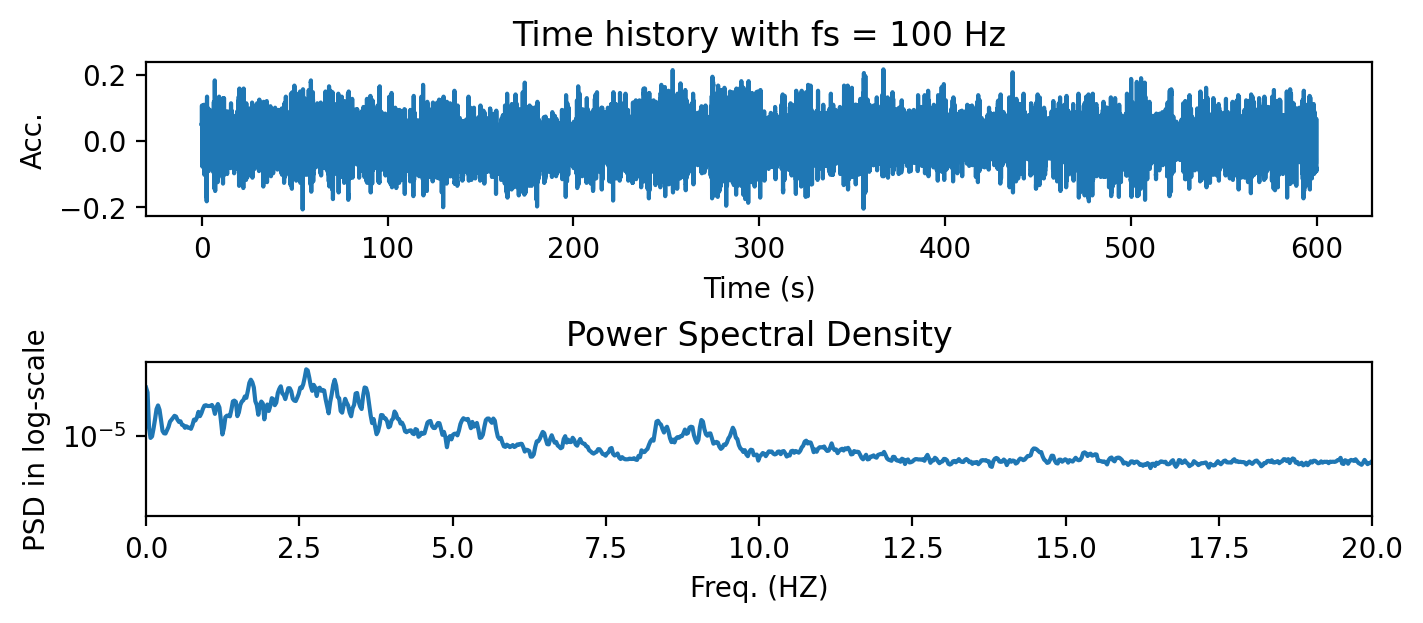

ambiguous_drift %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
t.shape: (60000,) // signals.shape: (60000, 133)
f.shape: (2049, 1) // Pxx.shape: (2049, 133)


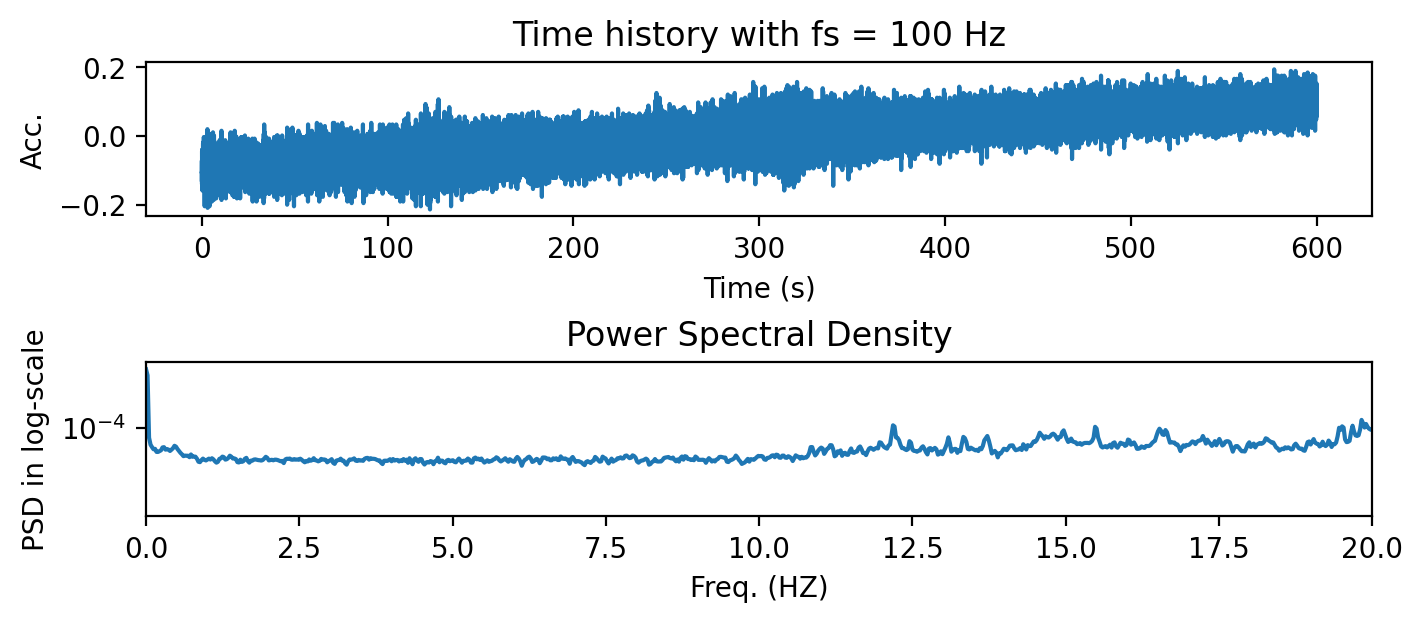

ambiguous_trend %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
t.shape: (60000,) // signals.shape: (60000, 156)
f.shape: (2049, 1) // Pxx.shape: (2049, 156)


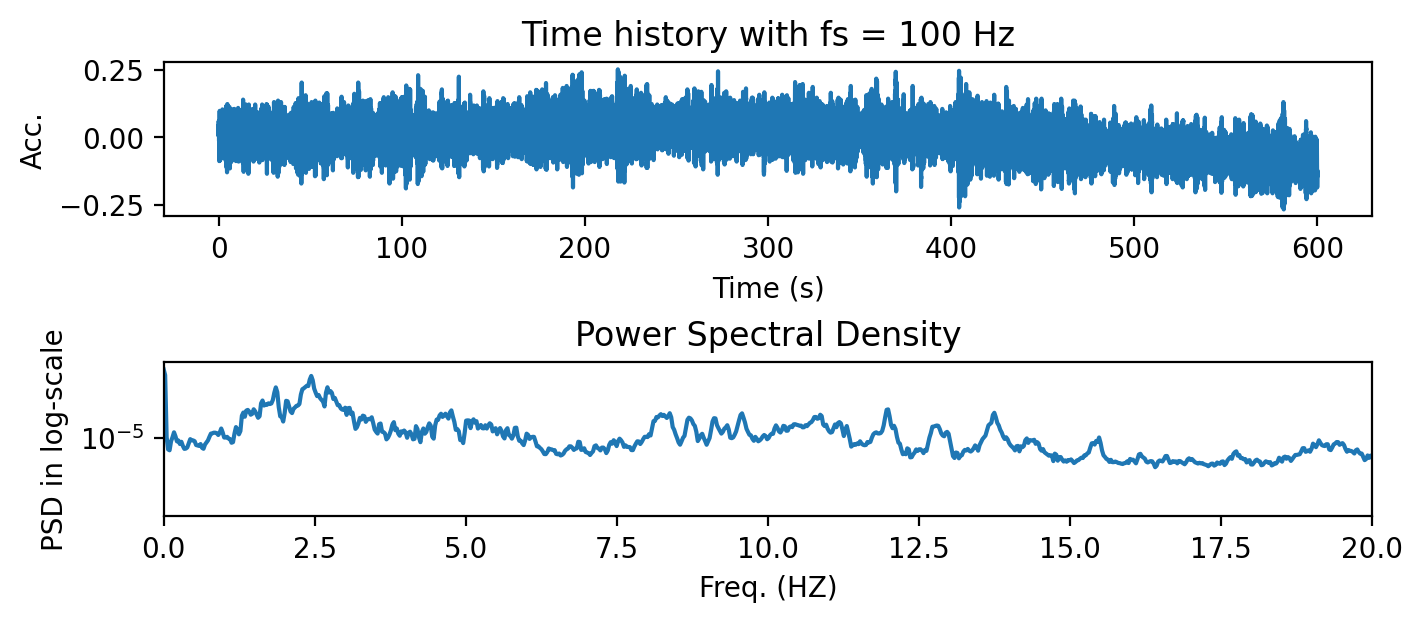

Drift %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
t.shape: (60000,) // signals.shape: (60000, 112)
f.shape: (2049, 1) // Pxx.shape: (2049, 112)


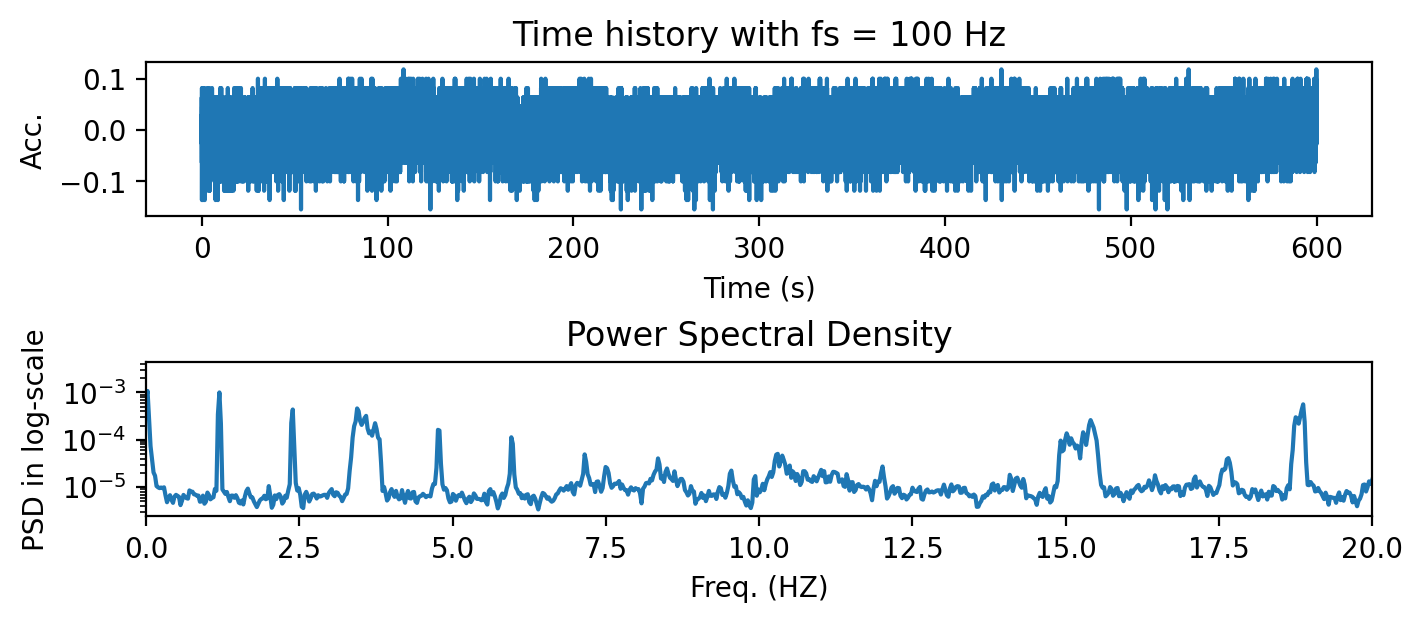

Minor %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
t.shape: (60000,) // signals.shape: (60000, 113)
f.shape: (2049, 1) // Pxx.shape: (2049, 113)


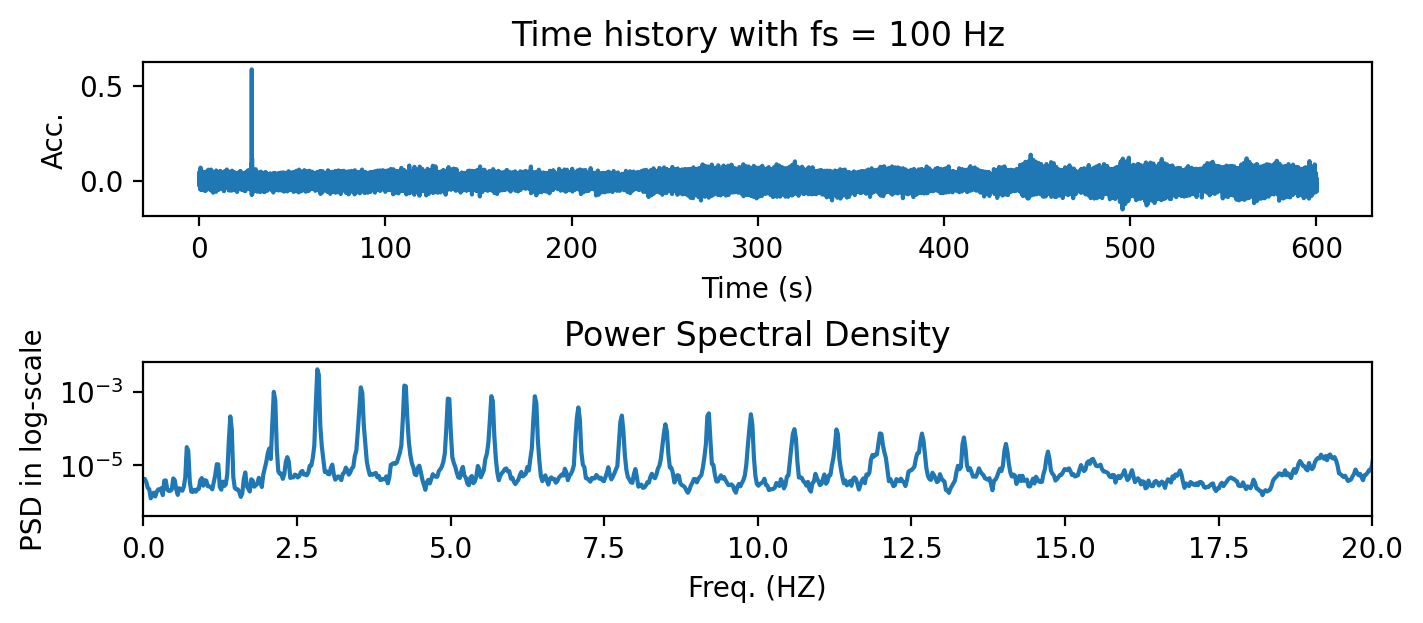

Outlier %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
t.shape: (60000,) // signals.shape: (60000, 377)
f.shape: (2049, 1) // Pxx.shape: (2049, 377)


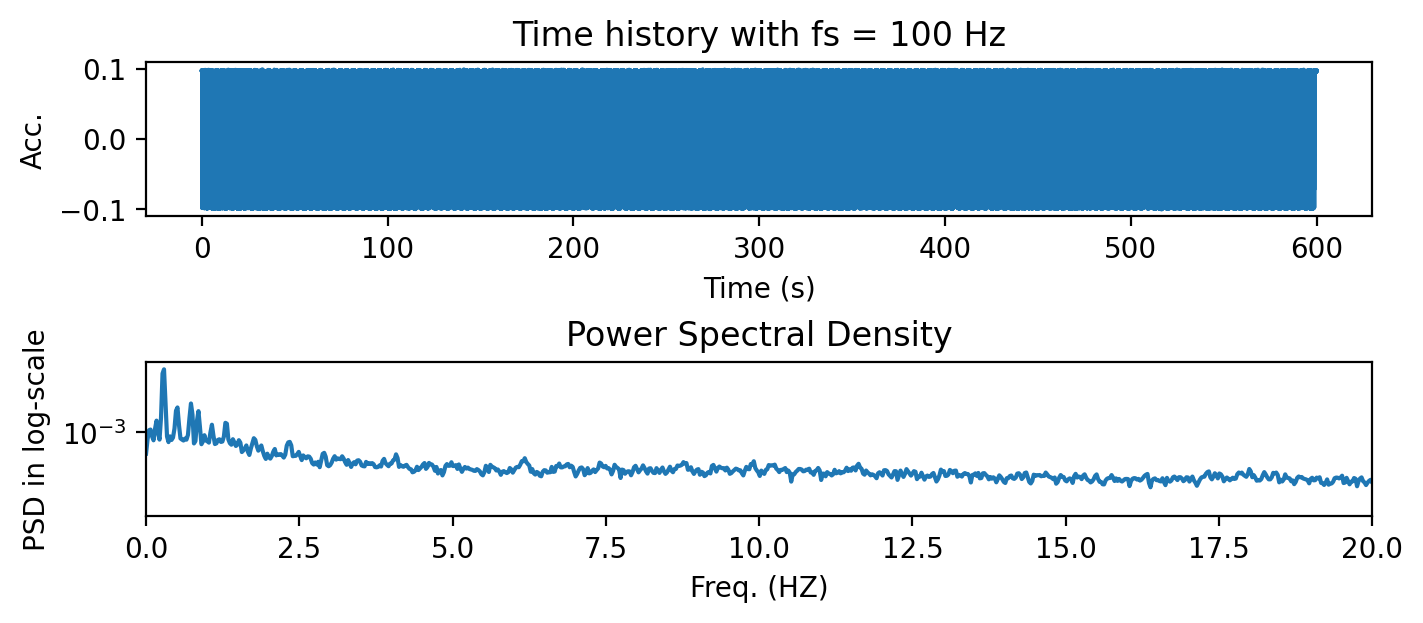

Square %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
t.shape: (60000,) // signals.shape: (60000, 154)
f.shape: (2049, 1) // Pxx.shape: (2049, 154)


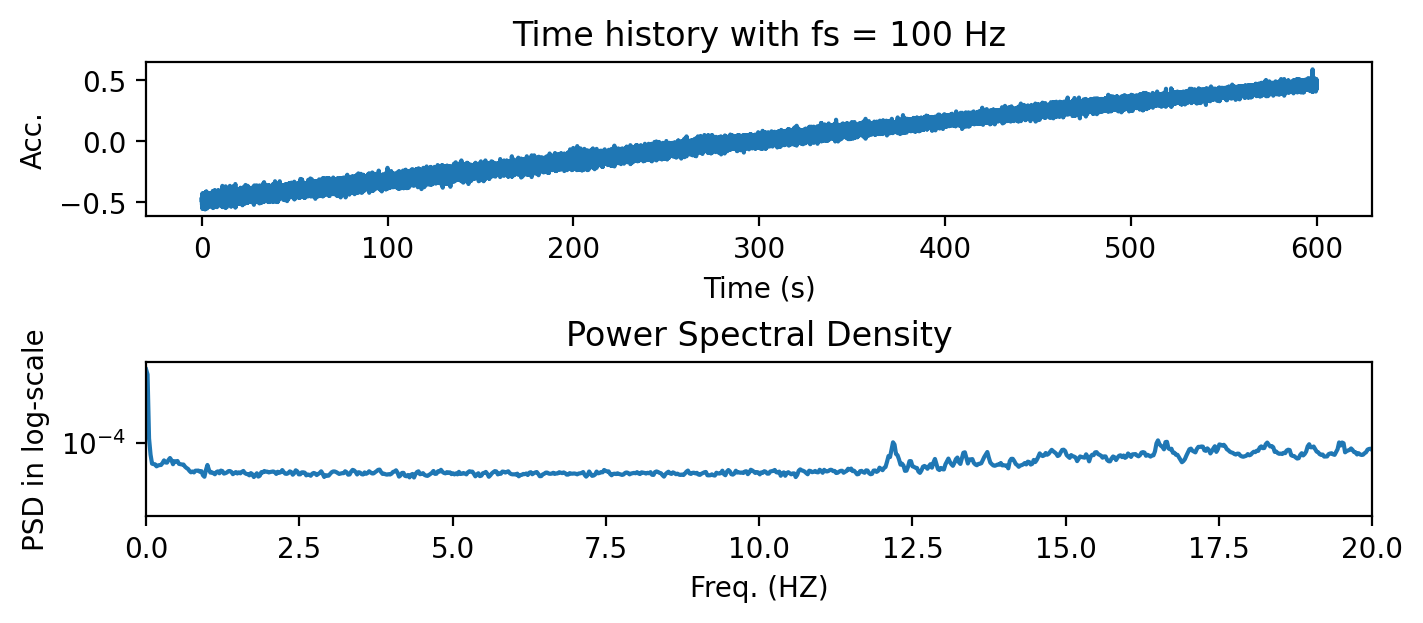

Trend %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
t.shape: (60000,) // signals.shape: (60000, 164)
f.shape: (2049, 1) // Pxx.shape: (2049, 164)


In [8]:
for fn in fn_list:
    df_psd = import_mat_and_save_csv(fn)